In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [4]:
import scanpy as sc
# SHOULD change to level2 rep cells
adata = sc.read('/Users/evanli/Documents/Research_datasets/PBMC_Hao/Hao_PBMC_level2_rep_cells.h5ad')
print('Original adata:', adata.shape)  # (32349, 20568)
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)

Original adata: (32340, 20568)
all cell types: ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


In [6]:
# first 10 celltypes
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Level2_pvl0_ttsplit/Tuning_result')
feature_no = {}

for celltype in types[:10]:
    print(celltype)
    # with open(f'./{celltype}/{celltype}_tuning.json') as f:
    with open(f'./{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    # with open(f'./{celltype}/{celltype}_opt_lambda.txt', 'r') as f:
    with open(f'./{celltype}_opt_lambda.txt', 'r') as f:
        opt_lmbd = float(f.read())
        # print(opt_lmbd)
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = log_lambda_range.index(log_opt_lmbd)
    # print(idx)

    feature_no_celltype = int(tuning['Feature_number'][idx])
    # print(feature_no_celltype)
    feature_no[celltype] = feature_no_celltype


ASDC
B_intermediate
B_memory
B_naive
CD14_Mono
CD16_Mono
CD4_CTL
CD4_Naive
CD4_Proliferating
CD4_TCM


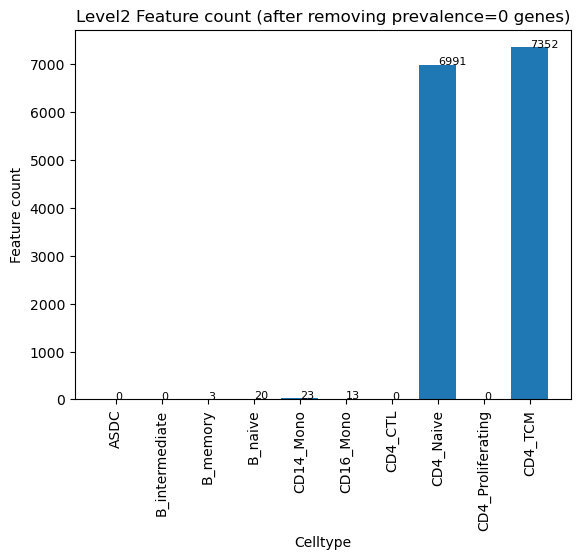

In [8]:
# plt.bar(feature_no_df['Celltype'], feature_no_df['Features'])
plt.bar(feature_no.keys(), feature_no.values())

# Add the values to each bar
for i, v in feature_no.items():
    plt.text(i, v, str(v), fontsize=8)

# Set the x-axis label
plt.xlabel('Celltype')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Feature count')

# Set y-axis to log scale
# plt.yscale('log')

plt.title('Level2 Feature count (after removing prevalence=0 genes)')
# Show the plot
plt.show()